In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [ ]:
rank_prob_df = df = pd.ExcelFile("/content/drive/MyDrive/IDSIA Biomedical Texts/FirstResults_v2.xlsx")

In [ ]:
rank_prob_df.sheet_names

['all results',
 'embeddings results',
 'Emotions',
 'Short Embeddings',
 'Avg Rank and Prob']

In [ ]:
rank_prob_df = pd.read_excel(df, sheet_name="Avg Rank and Prob")

In [ ]:
rank_prob_df

,Unnamed: 0,Rank Emotions,Panic Avg Rank,Anxiety Avg Rank,Unnamed: 4,Prob Emotions,Panic Avg Prob,Anxiety Avg Prob,Unnamed: 8,Ignore -,Unnamed: 10,Emotions,Anxiety Avg Prob.1,Unnamed: 13,Ignore -,Unnamed: 15,Emotions.1,Anxiety Avg Rank.1
0,0,fear,11.505819,8.414105,NaN,pride,0.001411,0.002997,NaN,NaN,0,excitement,0.002482,NaN,NaN,0,nervousness,9.730922
1,1,nervousness,14.383190,9.730922,NaN,disapproval,0.003110,0.004300,NaN,NaN,1,surprise,0.002840,NaN,NaN,1,fear,8.414105
2,2,confusion,13.827802,12.698373,NaN,embarrassment,0.004556,0.009886,NaN,NaN,2,pride,0.002997,NaN,NaN,2,approval,7.363472
3,3,curiosity,13.732112,14.916094,NaN,desire,0.005309,0.003606,NaN,NaN,3,desire,0.003606,NaN,NaN,3,caring,7.094394
4,4,caring,7.634483,7.094394,NaN,grief,0.005739,0.004760,NaN,NaN,4,disapproval,0.004300,NaN,NaN,4,sadness,11.478481
5,5,annoyance,13.184914,11.909584,NaN,disgust,0.005889,0.006274,NaN,NaN,5,grief,0.004760,NaN,NaN,5,disappointment,12.147559
6,6,relief,13.103017,10.577939,NaN,anger,0.008123,0.010354,NaN,NaN,6,disgust,0.006274,NaN,NaN,6,annoyance,11.909584
7,7,neutral,6.665086,8.045570,NaN,surprise,0.008672,0.002840,NaN,NaN,7,love,0.006489,NaN,NaN,7,excitement,17.079928
8,8,anger,17.567457,17.263653,NaN,remorse,0.009986,0.007406,NaN,NaN,8,remorse,0.007406,NaN,NaN,8,relief,10.577939
9,9,approval,7.952155,7.363472,NaN,disappointment,0.010023,0.008683,NaN,NaN,9,disappointment,0.008683,NaN,NaN,9,realization,9.892224


## Rank Emotions vs. Avg Rank

In [ ]:
rank_df = rank_prob_df.loc[:, ['Rank Emotions',	'Panic Avg Rank',	'Anxiety Avg Rank']]
rank_df

,Rank Emotions,Panic Avg Rank,Anxiety Avg Rank
0,fear,11.505819,8.414105
1,nervousness,14.383190,9.730922
2,confusion,13.827802,12.698373
3,curiosity,13.732112,14.916094
4,caring,7.634483,7.094394
5,annoyance,13.184914,11.909584
6,relief,13.103017,10.577939
7,neutral,6.665086,8.045570
8,anger,17.567457,17.263653
9,approval,7.952155,7.363472


In [ ]:
rank_df['rank_diff'] = abs(rank_df['Panic Avg Rank'] - rank_df['Anxiety Avg Rank'])
rank_df = rank_df.sort_values(by=['rank_diff'], ascending=False)
rank_df

,Rank Emotions,Panic Avg Rank,Anxiety Avg Rank,rank_diff
1,nervousness,14.383190,9.730922,4.652268
0,fear,11.505819,8.414105,3.091714
27,admiration,16.470043,19.532007,3.061964
26,joy,12.612284,15.581555,2.969271
6,relief,13.103017,10.577939,2.525078
21,gratitude,15.437069,17.874141,2.437072
23,amusement,17.411422,19.650995,2.239573
16,embarrassment,21.463147,19.709946,1.753201
24,desire,16.568750,18.211212,1.642462
7,neutral,6.665086,8.045570,1.380484


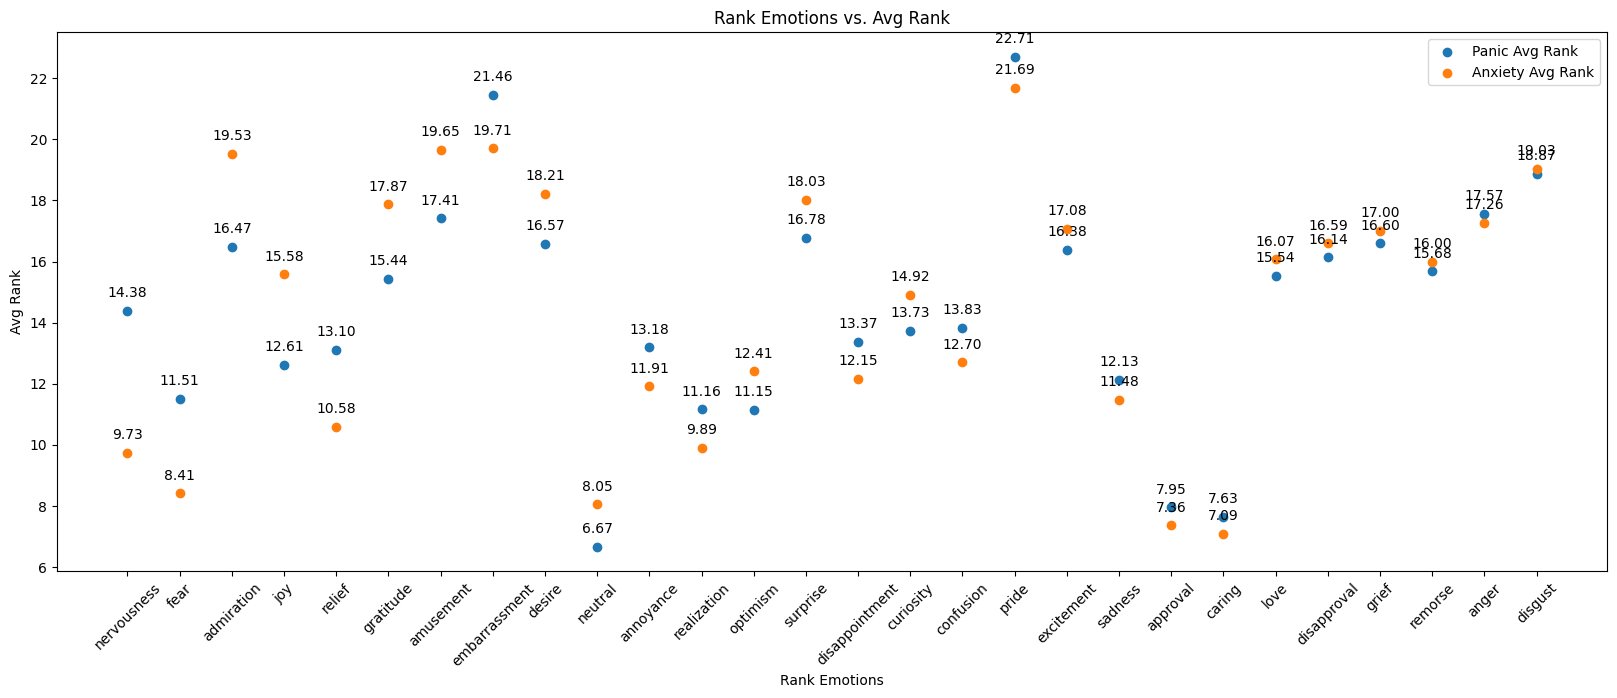

In [ ]:
x = rank_df['Rank Emotions']
y_panic = rank_df['Panic Avg Rank']
y_anxiety = rank_df['Anxiety Avg Rank']

plt.figure(figsize=(20,7))

plt.scatter(x, y_panic, label='Panic Avg Rank')
plt.scatter(x, y_anxiety, label='Anxiety Avg Rank')

plt.xlabel('Rank Emotions')
plt.ylabel('Avg Rank')
plt.title('Rank Emotions vs. Avg Rank')
plt.xticks(rotation=45)

# Add text annotations for the values (remove this if dont want values)
for i in range(len(x)):
    plt.annotate(f'{y_panic[i]:.2f}', (x[i], y_panic[i]), textcoords="offset points", xytext=(0, 10), ha='center')
    plt.annotate(f'{y_anxiety[i]:.2f}', (x[i], y_anxiety[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.legend()

plt.show()

In [ ]:
import plotly.graph_objects as go

# Create the scatter plot
fig = go.Figure()

# Add Panic Avg Rank trace
fig.add_trace(go.Scatter(
    x=rank_df['Rank Emotions'],
    y=rank_df['Panic Avg Rank'],
    mode='markers+text', # remove "+text" if dont want to show values
    name='Panic Avg Rank',
    text=[f'{val:.2f}' for val in rank_df['Panic Avg Rank']], # remove this if dont want to show values
    textposition='top center', # remve this if dont want to show values
    hovertemplate='Rank Emotions: %{x}<br>Panic Avg Rank: %{y}',
))

# Add Anxiety Avg Rank trace
fig.add_trace(go.Scatter(
    x=rank_df['Rank Emotions'],
    y=rank_df['Anxiety Avg Rank'],
    mode='markers+text',
    name='Anxiety Avg Rank',
    text=[f'{val:.2f}' for val in rank_df['Anxiety Avg Rank']],
    textposition='bottom center',
    hovertemplate='Rank Emotions: %{x}<br>Anxiety Avg Rank: %{y}',
))

# Set the axis labels and title
fig.update_layout(
    xaxis_title='Rank Emotions',
    yaxis_title='Avg Rank',
    title='Rank Emotions vs. Avg Rank',
    width = 1750,
    height = 650
)

# Show the plot
fig.show()

In [ ]:
rank_df[rank_df['rank_diff'] > 2]

,Rank Emotions,Panic Avg Rank,Anxiety Avg Rank,rank_diff
1,nervousness,14.383190,9.730922,4.652268
0,fear,11.505819,8.414105,3.091714
27,admiration,16.470043,19.532007,3.061964
26,joy,12.612284,15.581555,2.969271
6,relief,13.103017,10.577939,2.525078
21,gratitude,15.437069,17.874141,2.437072
23,amusement,17.411422,19.650995,2.239573


Rank Emotions vs. Avg Rank

Rank Emotions which have a lot of discrepancies (diff greater than 2) - <br>
['nervousness', 'fear', 'admiration', 'joy', 'relief', 'gratitude', 'amusement']

## Prob Emotions vs. Avg Prob

In [ ]:
prob_df = rank_prob_df.loc[:, ['Prob Emotions',	'Panic Avg Prob',	'Anxiety Avg Prob']]
prob_df

,Prob Emotions,Panic Avg Prob,Anxiety Avg Prob
0,pride,0.001411,0.002997
1,disapproval,0.003110,0.004300
2,embarrassment,0.004556,0.009886
3,desire,0.005309,0.003606
4,grief,0.005739,0.004760
5,disgust,0.005889,0.006274
6,anger,0.008123,0.010354
7,surprise,0.008672,0.002840
8,remorse,0.009986,0.007406
9,disappointment,0.010023,0.008683


In [ ]:
prob_df['prob_diff'] = abs(prob_df['Panic Avg Prob'] - prob_df['Anxiety Avg Prob'])
prob_df = prob_df.sort_values(by=['prob_diff'], ascending=False)
prob_df

,Prob Emotions,Panic Avg Prob,Anxiety Avg Prob,prob_diff
20,nervousness,0.047504,0.126400,0.078896
22,amusement,0.056260,0.008926,0.047334
26,fear,0.105668,0.149015,0.043347
25,neutral,0.103446,0.073725,0.029721
19,joy,0.040791,0.018425,0.022366
24,gratitude,0.084495,0.105305,0.020810
17,realization,0.035820,0.055037,0.019217
18,optimism,0.039971,0.022180,0.017791
14,love,0.022190,0.006489,0.015701
27,caring,0.173351,0.157965,0.015386


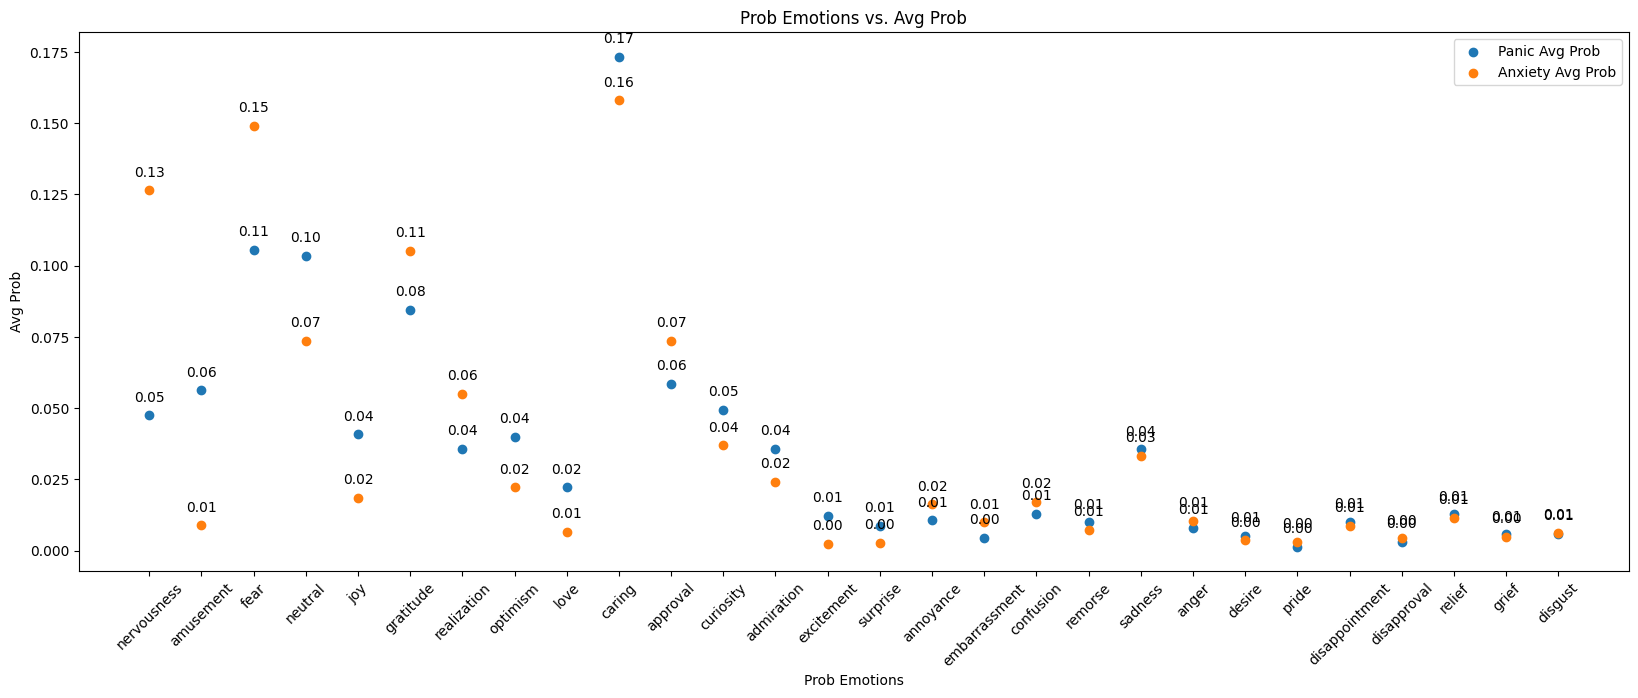

In [ ]:
x = prob_df['Prob Emotions']
y_panic = prob_df['Panic Avg Prob']
y_anxiety = prob_df['Anxiety Avg Prob']

plt.figure(figsize=(20,7))

plt.scatter(x, y_panic, label='Panic Avg Prob')
plt.scatter(x, y_anxiety, label='Anxiety Avg Prob')

plt.xlabel('Prob Emotions')
plt.ylabel('Avg Prob')
plt.title('Prob Emotions vs. Avg Prob')
plt.xticks(rotation=45)

# Add text annotations for the values (remove this if dont want values)
for i in range(len(x)):
    plt.annotate(f'{y_panic[i]:.2f}', (x[i], y_panic[i]), textcoords="offset points", xytext=(0, 10), ha='center')
    plt.annotate(f'{y_anxiety[i]:.2f}', (x[i], y_anxiety[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.legend()

plt.show()

In [ ]:
import plotly.graph_objects as go

# Create the scatter plot
fig = go.Figure()

# Add Panic Avg Rank trace
fig.add_trace(go.Scatter(
    x=prob_df['Prob Emotions'],
    y=prob_df['Panic Avg Prob'],
    mode='markers',
    name='Panic Avg Prob',
    hovertemplate='Prob Emotions: %{x}<br>Panic Avg Prob: %{y}',
))

# Add Anxiety Avg Rank trace
fig.add_trace(go.Scatter(
    x=prob_df['Prob Emotions'],
    y=prob_df['Anxiety Avg Prob'],
    mode='markers',
    name='Prob Avg Rank',
    hovertemplate='Prob Emotions: %{x}<br>Anxiety Avg Prob: %{y}',
))

# Set the axis labels and title
fig.update_layout(
    xaxis_title='Prob Emotions',
    yaxis_title='Avg Prob',
    title='Prob Emotions vs. Avg Prob',
    width = 1750,
    height = 650
)

# Show the plot
fig.show()

In [ ]:
prob_df[prob_df['prob_diff'] > 0.02]

,Prob Emotions,Panic Avg Prob,Anxiety Avg Prob,prob_diff
20,nervousness,0.047504,0.126400,0.078896
22,amusement,0.056260,0.008926,0.047334
26,fear,0.105668,0.149015,0.043347
25,neutral,0.103446,0.073725,0.029721
19,joy,0.040791,0.018425,0.022366
24,gratitude,0.084495,0.105305,0.020810


Prob Emotions vs. Avg Prob

Prob Emotions which have a lot of discrepancies (diff greater than 0.02) - <br>
['nervousness', 'amusement', 'fear', 'neutral', 'joy', 'gratitude']

## Comparing Emotions -

Rank Emotions which have a lot of discrepancies (diff greater than 2) - <br>
['nervousness', 'fear', 'admiration', 'joy', 'relief', 'gratitude', 'amusement']

Prob Emotions which have a lot of discrepancies (diff greater than 0.02) - <br>
['nervousness', 'amusement', 'fear', 'neutral', 'joy', 'gratitude']

Intersection - <br>
['nervousness', 'amusement', 'fear', 'joy', 'gratitude']

Union - <br>
['nervousness', 'fear', 'admiration', 'joy', 'relief', 'gratitude', 'amusement', 'neutral']

## LR and XGBoost

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [ ]:
pickle_in = open("/content/drive/MyDrive/IDSIA Biomedical Texts/AllSourceEmotions_TwentyJune.pickle", 'rb')
df = pickle.load(pickle_in)
df.head(1)

,urls,text,source,label,WC,Analytic,Clout,Authentic,Tone,WPS,...,pride,realization,relief,remorse,sadness,surprise,neutral,all_emolabelprob,all_emo_labels,all_emo_label_rank
0,https://www.quora.com/What-are-panic-attacks-l...,I have been dealing with these for quite some ...,Quora,1,607,55.22,35.35,48.82,1.0,26.39,...,0.000041,0.000323,0.001267,0.00033,0.000575,0.000205,0.000843,"[(fear, 0.8543168), (nervousness, 0.068863705)...","[fear, nervousness, confusion, curiosity, cari...","{'fear': 1, 'nervousness': 2, 'confusion': 3, ..."


In [ ]:
# Whole
pickle_in = open("/content/drive/MyDrive/IDSIA Biomedical Texts/Sentence Embeddings/AllSource_alldistilrobertav1_via_UMAP_SHORTembeddings.pickle", 'rb')
sentence_embeddings = pickle.load(pickle_in)
sentence_embeddings

array([[10.64194  ,  5.0430765,  5.6824026, ...,  4.9058275,  6.8707986,
         4.538727 ],
       [11.312859 ,  5.364349 ,  4.41365  , ...,  4.92234  ,  6.8475184,
         4.5590596],
       [10.531799 ,  4.894456 ,  5.387705 , ...,  4.8968716,  6.8360796,
         4.530069 ],
       ...,
       [10.346373 ,  4.4247556,  3.5815325, ...,  5.0401225,  6.552696 ,
         4.490976 ],
       [10.454275 ,  4.5640407,  3.6035635, ...,  5.0320673,  6.564847 ,
         4.4918733],
       [11.222271 ,  5.1468487,  4.0054016, ...,  5.079988 ,  6.6341186,
         4.5597043]], dtype=float32)

In [ ]:
sentence_embeddings.shape

(7405, 28)

In [ ]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import roc_auc_score, make_scorer # not able to import balanced_accuray_score
from sklearn.model_selection import GridSearchCV # cross validation, used for hyperparamter tuning
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve, auc

In [ ]:
# Short Embeddings + selected emotions (4 models)

#X = np.concatenate((df[['nervousness', 'fear', 'admiration', 'joy', 'relief', 'gratitude', 'amusement']] , sentence_embeddings), axis=1)  # Rank Emotions
#X = np.concatenate((df[['nervousness', 'amusement', 'fear', 'neutral', 'joy', 'gratitude']] , sentence_embeddings), axis=1)  # Prob Emotions
#X = np.concatenate((df[['nervousness', 'amusement', 'fear', 'joy', 'gratitude']] , sentence_embeddings), axis=1)  # Intersection
X = np.concatenate((df[['nervousness', 'fear', 'admiration', 'joy', 'relief', 'gratitude', 'amusement', 'neutral']] , sentence_embeddings), axis=1)  # Union
y = df['label']

In [ ]:
X

array([[6.8863705e-02, 8.5431677e-01, 1.6097219e-05, ..., 4.9058275e+00,
        6.8707986e+00, 4.5387268e+00],
       [1.3414663e-02, 4.5312576e-02, 5.3580854e-05, ..., 4.9223399e+00,
        6.8475184e+00, 4.5590596e+00],
       [3.5853222e-02, 8.1237547e-02, 1.0068560e-04, ..., 4.8968716e+00,
        6.8360796e+00, 4.5300689e+00],
       ...,
       [6.6338234e-06, 8.5411566e-06, 2.2835303e-04, ..., 5.0401225e+00,
        6.5526962e+00, 4.4909759e+00],
       [1.6793184e-02, 7.8927781e-03, 6.4288128e-05, ..., 5.0320673e+00,
        6.5648470e+00, 4.4918733e+00],
       [2.1106399e-04, 1.9220867e-03, 3.8129615e-03, ..., 5.0799880e+00,
        6.6341186e+00, 4.5597043e+00]], dtype=float32)

In [ ]:
X.shape

(7405, 36)

In [ ]:
clf = LogisticRegression(solver='lbfgs', max_iter=11000)
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', missing=0, seed=42) # missing=None not working

In [ ]:
logistic_f1scores = []
logistic_rocaucscore = []
logistic_praucscore = []
xgb_f1scores = []
xgb_rocaucscore = []
xgb_praucscore = []

for train_index, test_index in folds.split(X, y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

    # Logistic
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred,average='weighted')
    logistic_f1scores.append(f1)
    rocaucscore = roc_auc_score(y_test, y_pred)
    logistic_rocaucscore.append(rocaucscore)
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)  # Compute precision, recall, and thresholds
    pr_auc = auc(recall, precision)  # Calculate PR-AUC
    logistic_praucscore.append(pr_auc)

    # XGBoost
    clf_xgb.fit(X_train, y_train,
              verbose=False,  # set to True for individual use
              early_stopping_rounds=10,
              #eval_metrics='aucpr',
              eval_set = [(X_test,y_test)])
    y_pred = clf_xgb.predict(X_test)
    f1 = f1_score(y_test, y_pred,average='weighted')
    xgb_f1scores.append(f1)
    rocaucscore = roc_auc_score(y_test, y_pred)
    xgb_rocaucscore.append(rocaucscore)
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)  # Compute precision, recall, and thresholds
    pr_auc = auc(recall, precision)  # Calculate PR-AUC
    xgb_praucscore.append(pr_auc)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.1

In [ ]:
print(logistic_f1scores)
print(np.mean(logistic_f1scores))
print(np.std(logistic_f1scores))

[0.884299567602443, 0.8504716554690063, 0.8890883646263906, 0.8951890200633896, 0.8730530455393893, 0.8490980289934064, 0.8781007753170493, 0.8769816219764351, 0.8771472962649433, 0.8932821864860699]
0.8766711562338523
0.015143863943173443


In [ ]:
print(logistic_rocaucscore)
print(np.mean(logistic_rocaucscore))
print(np.std(logistic_rocaucscore))

[0.8698493713432092, 0.8349075687787876, 0.8796293414664509, 0.8813799327772938, 0.8561364060749409, 0.8341454272863569, 0.8677848575712143, 0.8681752873563219, 0.8611787856071964, 0.8862443778110944]
0.8639431356072865
0.017072059423004184


In [ ]:
print(logistic_praucscore)
print(np.mean(logistic_praucscore))
print(np.std(logistic_praucscore))

[0.9324705087666525, 0.9150801292912769, 0.9378842391406588, 0.9382055096038107, 0.9256070653161343, 0.9149462903260327, 0.9320559279014891, 0.9324516605036628, 0.9283353131254487, 0.9418069480816185]
0.9298843592056784
0.008697060287946824


In [ ]:
print(xgb_f1scores)
print(np.mean(xgb_f1scores))
print(np.std(xgb_f1scores))

[0.904077069081231, 0.8717479556410761, 0.9071709075871612, 0.914754009468212, 0.8942434597918207, 0.8757658282839372, 0.8998496287710285, 0.8990946553691366, 0.9010871009359946, 0.9057317732218299]
0.8973522388151427
0.012919392121511468


In [ ]:
print(xgb_rocaucscore)
print(np.mean(xgb_rocaucscore))
print(np.std(xgb_rocaucscore))

[0.8965750653554089, 0.8627108489978838, 0.903822513382298, 0.9066506909000374, 0.8832122183493092, 0.8678317091454273, 0.8916323088455772, 0.8964267866066966, 0.8919758870564718, 0.9025487256371814]
0.8903386754276292
0.014134848362210095


In [ ]:
print(xgb_praucscore)
print(np.mean(xgb_praucscore))
print(np.std(xgb_praucscore))

[0.9466894782480713, 0.9294544451850083, 0.9513228944376857, 0.9515659841370478, 0.9394379540871214, 0.9324089063313201, 0.9442664647406026, 0.9479478656728446, 0.9442741074590953, 0.9508839311740725]
0.9438252031472869
0.007400377173616036
